<a href="https://colab.research.google.com/github/acheggaf/Portfolio/blob/main/data/scripts/Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#!git clone https://github.com/KalyDL/ProjetAP

#Chargement des données


In [36]:
#Import

import os
import shutil
import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat
import csv
import matplotlib.pyplot as plt
import random as rdm
import tensorflow as tf

In [18]:
def list_genre(data_path):
    dirs = os.listdir(data_path) 
    classes = dict()
    for idx_img in range(len(dirs)):
      item = dirs[idx_img]
      if os.path.isfile(data_path + "/" + item):
        # Copie de l'image si elle possède la classe recherchée
        genres = item.lstrip("0123456789_").replace(".jpg","").split("_")
        for genre in genres:
          if genre in classes:
            classes[genre] = classes[genre] + 1
          else:
            classes[genre] = 1
    return {k: v for k, v in sorted(classes.items(), key=lambda item: item[1])}

In [21]:
#Liste des classes
#pathLocal = "../../data/db/pics/test"
pathLocal = "ProjetAP/data/db/pics/test"
classes = list_genre(pathLocal)
i = 1
labels = dict()
labelsRevert = dict()
for key in classes:
  labels[key] = i
  labelsRevert[i] = key
  i += 1

In [22]:
def list_genre(data_path):
    dirs = os.listdir(data_path) 
    classes = dict()
    for idx_img in range(len(dirs)):
      item = dirs[idx_img]
      if os.path.isfile(data_path + "/" + item):
        # Copie de l'image si elle possède la classe recherchée
        genre = item.lstrip("0123456789_").replace(".jpg","").split("_")[0]
        if genre in classes:
          classes[genre] = classes[genre] + 1
        else:
          classes[genre] = 1
    return {k: v for k, v in sorted(classes.items(), key=lambda item: item[1])}

In [24]:
#Création dataset
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt 

# path = "../../data/db/pics/"
path = "ProjetAP/data/db/pics"

# G
image_size = 64
#Génération des données 
x_train, y_train = load_data(path, labels, 'train', image_size)
x_test, y_test = load_data(path, labels, 'test', image_size)
x_validation, y_validation = load_data(path, labels, 'validation', image_size)

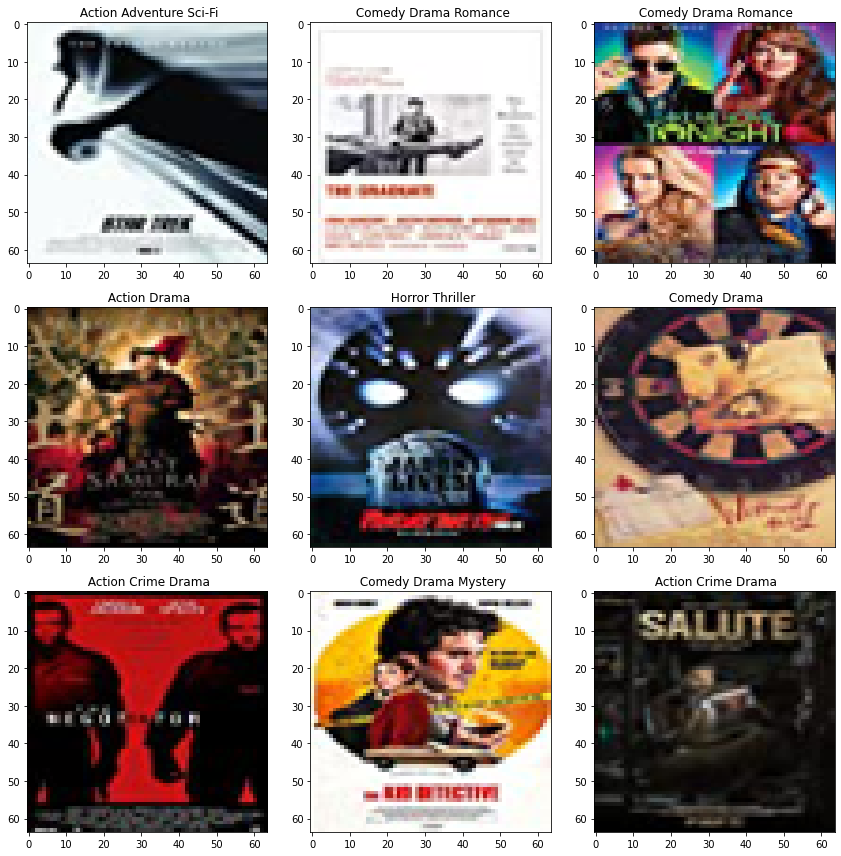

In [25]:
# Afficher dataset
plt.figure(figsize=(12, 12))
shuffle_indices = np.random.permutation(9)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    image = x_train[shuffle_indices[i]]
    titre = ""
    for g in y_train[shuffle_indices[i]]:
      j = int(g)
      if j != 0:
        titre = titre + " " + labelsRevert[j]
    plt.title(titre)
    plt.imshow(image/255)

plt.tight_layout()
plt.show()

from keras import models
from keras import layers

conv_base.trainable = False

# A COMPLETER
 
inputs = keras.Input(shape=(150, 150, 3))
model.add(Dense(3, activation='sigmoid')) 


model.summary()
inputs = keras.Input(shape=(image_size, image_size, 3))

model = base_model(inputs, training=False)
model = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1)(x)


In [26]:
def list_genre(data_path):
    dirs = os.listdir(data_path) 
    classes = dict()
    for idx_img in range(len(dirs)):
      item = dirs[idx_img]
      if os.path.isfile(data_path + "/" + item):
        # Copie de l'image si elle possède la classe recherchée
        genre = item.lstrip("0123456789_").replace(".jpg","").split("_")[0]
        if genre in classes:
          classes[genre] = classes[genre] + 1
        else:
          classes[genre] = 1
    return {k: v for k, v in sorted(classes.items(), key=lambda item: item[1])}

In [27]:
list_genre(path + "/train")

{'Action': 1459,
 'Adventure': 351,
 'Animation': 333,
 'Biography': 311,
 'Comedy': 1374,
 'Crime': 476,
 'Drama': 1271,
 'Family': 8,
 'Fantasy': 38,
 'History': 1,
 'Horror': 404,
 'Mystery': 24,
 'Romance': 18,
 'Sci-Fi': 13,
 'Thriller': 68}

In [50]:
def copy_data(data_path, classe, dest):
    dirs = os.listdir(data_path)
    idx_img = 0
    i = 0
    while (idx_img < len(dirs)) and i < 100:
      item = dirs[idx_img]
      if os.path.isfile(data_path + "/" + item):
        # Copie de l'image si elle possède la classe recherchée
        genre = item.lstrip("0123456789_").replace(".jpg","").split("_")[0]
        if (classe == genre):
          shutil.copy(data_path + "/" + item, dest)
          i+=1
      idx_img += 1
    return

def mkdir2(path):
  if not(os.path.exists(path)):
    os.mkdir(path)

def create_test_data(data_path, target_path, classes):
  mkdir2("temp")
  mkdir2(target_path+"/test")
  mkdir2(target_path+"/validation")
  mkdir2(target_path+"/train")
  for key in classes:
    copy_data(data_path, key,"temp")
    dirs = os.listdir("temp")                   
    for img in range(len(dirs)):
      item = dirs[img]
      if os.path.isfile("temp/" + item):
        r = rdm.uniform(0, 1)
        if (r < 0.1):
          # move to test
          shutil.copy("temp/" + item, target_path+"/test")
          os.remove("temp/" + item)
        elif (r < 0.3):
          # move to validation
          shutil.copy("temp/" + item, target_path+"/validation")
          os.remove("temp/" + item)
        else:
          # move to train
          shutil.copy("temp/" + item, target_path+"/train")
          os.remove("temp/" + item)

In [31]:
pathDirect = "ProjetAP/Essai1"
# pathDirect = "../../Essai1"
create_test_data(path+"/train",  pathDirect,["Adventure", "Animation", "Horror"])

In [51]:
print(labels)

{'History': 1, 'Animation': 2, 'Family': 3, 'Biography': 4, 'Sci-Fi': 5, 'Mystery': 6, 'Fantasy': 7, 'Horror': 8, 'Romance': 9, 'Crime': 10, 'Thriller': 11, 'Adventure': 12, 'Action': 13, 'Comedy': 14, 'Drama': 15}


In [53]:
#Génération des données 
x_train, y_train = load_data(pathDirect, labels, 'train', image_size)
x_test, y_test = load_data(pathDirect, labels, 'test', image_size)
x_validation, y_validation = load_data(pathDirect, labels, 'validation', image_size)

In [32]:
## Show training stats

def plot_training_analysis():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

## Transfer Learning

In [33]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', # On utilise les poids du réseau déjà pré-entrainé sur la base de données ImageNet
                  include_top=False, # On ne conserve pas la partie Dense du réseau originel
                  input_shape=(image_size, image_size, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [65]:
from keras import models
from keras import layers

conv_base.trainable = False

# A COMPLETER
 
inputs = tf.keras.Input(shape=(image_size, image_size, 3))

model = conv_base(inputs,training = False)

model = Dense(3, activation='sigmoid')(model)





model = tf.keras.layers.GlobalAveragePooling2D()(model)
outputs = tf.keras.layers.Dense(3)(model)
model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 dense_14 (Dense)            (None, 2, 2, 3)           1539      
                                                                 
 global_average_pooling2d_4   (None, 3)                0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_15 (Dense)            (None, 3)                 12        
                                                                 
Total params: 14,716,239
Trainable params: 1,551
Non-trainable params: 14,714,688
___________________________________________

In [67]:
from tensorflow.keras import optimizers


# AJOUTER EGALEMENT LA FONCTION DE COUT
model.compile(optimizer=optimizers.Adam(lr=3e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# COMPLETER AVEC LES TENSEURS SUR LESQUELS EFFECTUER L'APPRENTISSAGE
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=16,
                    validation_data=(x_validation, y_validation))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


18/18 [==============================] - 18s 962ms/step - loss: 121.0404 - accuracy: 0.3141 - val_loss: 119.9098 - val_accuracy: 0.3448
Epoch 2/5
18/18 [==============================] - 17s 946ms/step - loss: 123.8074 - accuracy: 0.3141 - val_loss: 129.2559 - val_accuracy: 0.3448
Epoch 3/5
18/18 [==============================] - 18s 994ms/step - loss: 129.2078 - accuracy: 0.3249 - val_loss: 131.3229 - val_accuracy: 0.3362
Epoch 4/5
18/18 [==============================] - 17s 949ms/step - loss: 130.7602 - accuracy: 0.3285 - val_loss: 129.7411 - val_accuracy: 0.3276
Epoch 5/5
18/18 [==============================] - 17s 946ms/step - loss: 130.4668 - accuracy: 0.3285 - val_loss: 136.2002 - val_accuracy: 0.3276


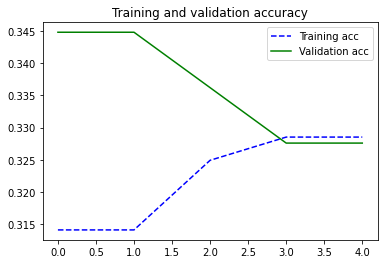

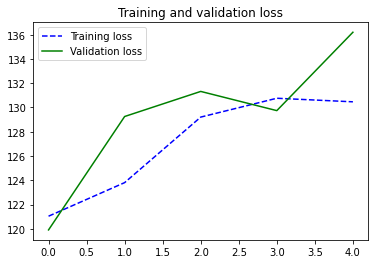

In [68]:
plot_training_analysis()